# San Francisco Housing Rental Analysis

In this assignment, you will perform basic analysis for the San Francisco Housing Market to allow potential real estate investors to choose rental investment properties. 

In [160]:
# initial imports
import os
import pandas as pd
import matplotlib.pyplot as plt
import hvplot.pandas
import plotly.express as px
from pathlib import Path
from dotenv import load_dotenv
import panel as pn

%matplotlib inline

In [224]:
# Read the Mapbox API key
load_dotenv()
mapbox_token = os.getenv("mapbox")
px.set_mapbox_access_token(mapbox_token)

## Load Data

In [202]:
# Read the census data into a Pandas DataFrame
file_path = Path("Data/sfo_neighborhoods_census_data.csv")
sfo_data = pd.read_csv(file_path, index_col="year")
sfo_data.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
year,,,,
2010,Alamo Square,291.182945,372560,1239
2010,Anza Vista,267.932583,372560,1239
2010,Bayview,170.098665,372560,1239
2010,Buena Vista Park,347.394919,372560,1239
2010,Central Richmond,319.027623,372560,1239


- - - 

## Housing Units Per Year

In this section, you will calculate the number of housing units per year and visualize the results as a bar chart using the Pandas plot function. 

Hint: Use the Pandas groupby function

Optional challenge: Use the min, max, and std to scale the y limits of the chart.

In [37]:
# Calculate the mean number of housing units per year (hint: use groupby) 
sfo_data_mean = (
    sfo_data[["housing_units"]]
    .groupby("year")
    .mean()
)
sfo_data_mean

,housing_units
year,
2010,372560
2011,374507
2012,376454
2013,378401
2014,380348
2015,382295
2016,384242


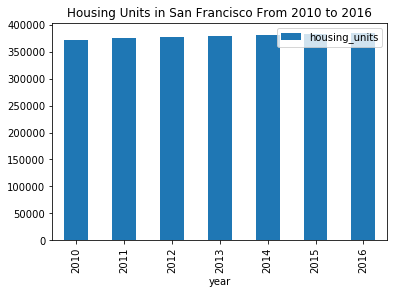

In [241]:
# Use the Pandas plot function to plot the average housing units per year.
# Note: You will need to manually adjust the y limit of the chart using the min and max values from above.


plt_chart = sfo_data_mean.plot.bar(title = "Housing Units in San Francisco From 2010 to 2016")
plt_chart

In [251]:
min1 = min(sfo_data_mean['housing_units'])
max2 = max(sfo_data_mean['housing_units'])
std1 = (sfo_data_mean['housing_units']).std()
std1

4206.0007132667015

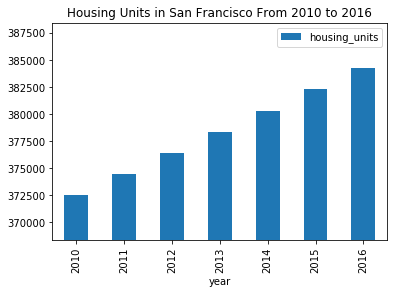

In [271]:
# Optional Challenge: Use the min, max, and std to scale the y limits of the chart

plt_chart_1= sfo_data_mean.plot.bar(title = "Housing Units in San Francisco From 2010 to 2016", ylim=(min1-std1, max2+std1))
plt_chart_1

- - - 

## Average Prices per Square Foot

In this section, you will calculate the average gross rent and average sales price for each year. Plot the results as a line chart.

### Average Gross Rent in San Francisco Per Year

In [82]:
# Calculate the average gross rent and average sale price per square foot
aver_rent_price = sfo_data.iloc[:,[1,3]].groupby('year').mean()
aver_rent_price.head()

,sale_price_sqr_foot,gross_rent
year,,
2010,369.344353,1239
2011,341.903429,1530
2012,399.389968,2324
2013,483.600304,2971
2014,556.277273,3528


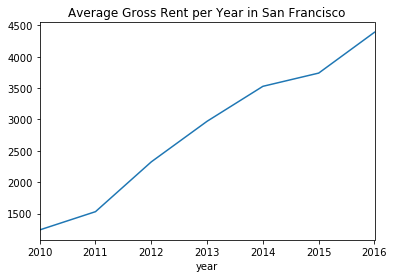

In [228]:
# Plot the Average Gross Rent per Year as a Line Chart 
aver_gross_rent = aver_rent_price["gross_rent"]

aver_gross_rent_gr = aver_gross_rent.plot(title = "Average Gross Rent per Year in San Francisco")
aver_gross_rent_gr

### Average Sales Price per Year

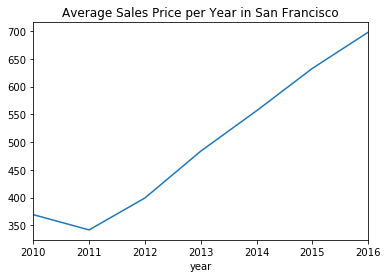

In [229]:
# Plot the Average Sales Price per Year as a line chart
aver_sales_price = aver_rent_price["sale_price_sqr_foot"]

aver_sales_price_gr= aver_sales_price.plot(title = "Average Sales Price per Year in San Francisco")
aver_sales_price_gr

- - - 

## Average Prices by Neighborhood

In this section, you will use hvplot to create an interactive visulization of the Average Prices with a dropdown selector for the neighborhood.

Hint: It will be easier to create a new DataFrame from grouping the data and calculating the mean prices for each year and neighborhood

In [156]:
# Group by year and neighborhood and then create a new dataframe of the mean values
group_by_neigh = sfo_data.groupby(['neighborhood', "year"]).mean()
group_by_neigh.head()

sale_price_sqr_foot  housing_units  gross_rent
neighborhood year                                                
Alamo Square 2010           291.182945         372560        1239
             2011           272.527310         374507        1530
             2012           183.099317         376454        2324
             2013           387.794144         378401        2971
             2014           484.443552         380348        3528

In [264]:
# Use hvplot to create an interactive line chart of the average price per sq ft.
# The plot should have a dropdown selector for the neighborhood
plot_data = group_by_neigh.drop(columns=['housing_units', 'gross_rent'])
plot_data.head()

sale_price_sqr_foot
neighborhood year                     
Alamo Square 2010           291.182945
             2011           272.527310
             2012           183.099317
             2013           387.794144
             2014           484.443552

In [265]:
plot_data1 = plot_data.reset_index()

In [267]:
plot_data1.head()

,neighborhood,year,sale_price_sqr_foot
0,Alamo Square,2010,291.182945
1,Alamo Square,2011,272.527310
2,Alamo Square,2012,183.099317
3,Alamo Square,2013,387.794144
4,Alamo Square,2014,484.443552


In [162]:
#adding np extention 
pn.extension()

In [270]:
plot_data_gr = plot_data1.hvplot(label= "the average price per sq ft by neighborhood", groupby = "neighborhood", x = "year", y="sale_price_sqr_foot")
plot_data_gr

:DynamicMap   [neighborhood]
   :Curve   [year]   (sale_price_sqr_foot)

- - - 

## The Top 10 Most Expensive Neighborhoods

In this section, you will need to calculate the mean sale price for each neighborhood and then sort the values to obtain the top 10 most expensive neighborhoods on average. Plot the results as a bar chart.

In [274]:
# Getting the data from the top 10 expensive neighborhoods
sfo_data_2 = sfo_data.groupby('neighborhood').mean().sort_values('sale_price_sqr_foot', ascending=False).rename(columns={"sale_price_sqr_foot": "average_sale_price_sqr_foot"})
sfo_data_2.head(10)

,average_sale_price_sqr_foot,housing_units,gross_rent
neighborhood,,,
Union Square District,903.993258,377427.50,2555.166667
Merced Heights,788.844818,380348.00,3414.000000
Miraloma Park,779.810842,375967.25,2155.250000
Pacific Heights,689.555817,378401.00,2817.285714
Westwood Park,687.087575,382295.00,3959.000000
Telegraph Hill,676.506578,378401.00,2817.285714
Presidio Heights,675.350212,378401.00,2817.285714
Cow Hollow,665.964042,378401.00,2817.285714
Potrero Hill,662.013613,378401.00,2817.285714


In [276]:
# Plotting the data from the top 10 expensive neighborhoods
sfo_data_2_gr = sfo_data_2.iloc[0:10, 0].hvplot.bar(label = "The top 10 expensive neighborhoods in San Francisco From 2010 to 2016", rot=90)
sfo_data_2_gr

:Bars   [neighborhood]   (average_sale_price_sqr_foot)

- - - 

## Parallel Coordinates and Parallel Categories Analysis

In this section, you will use plotly express to create parallel coordinates and parallel categories visualizations so that investors can interactively filter and explore various factors related to the sales price of the neighborhoods. 

Using the DataFrame of Average values per neighborhood (calculated above), create the following visualizations:
1. Create a Parallel Coordinates Plot
2. Create a Parallel Categories Plot

In [277]:
sfo_data_2 = sfo_data_2.reset_index()

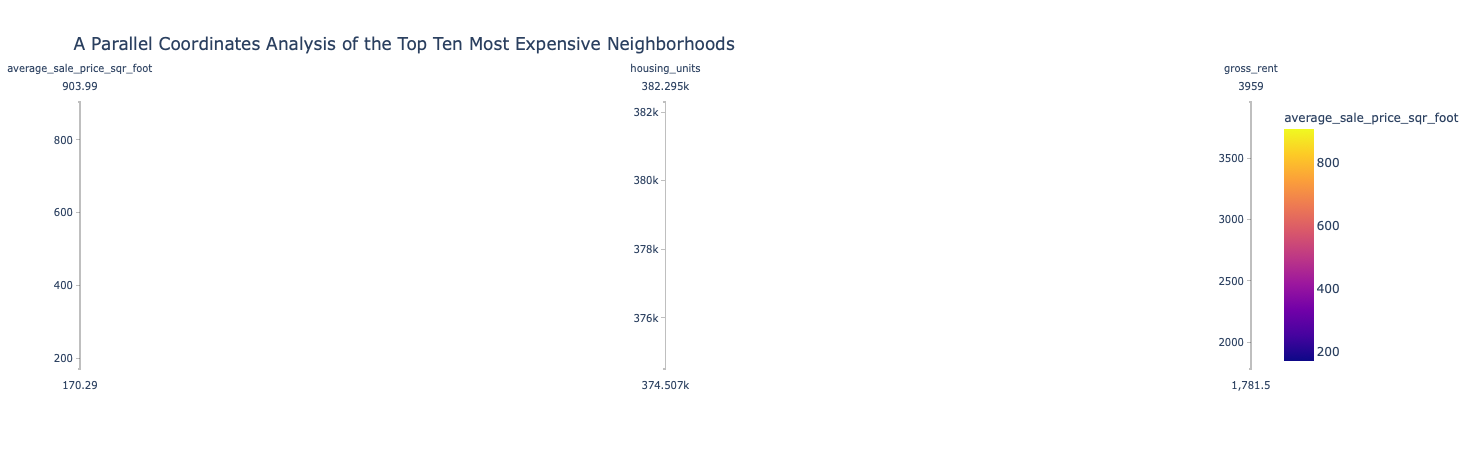

In [235]:
# Parallel Coordinates Plot 
parallel_coordinates = px.parallel_coordinates(sfo_data_2, color="average_sale_price_sqr_foot", 
                       title="A Parallel Coordinates Analysis of the Top Ten Most Expensive Neighborhoods")
parallel_coordinates

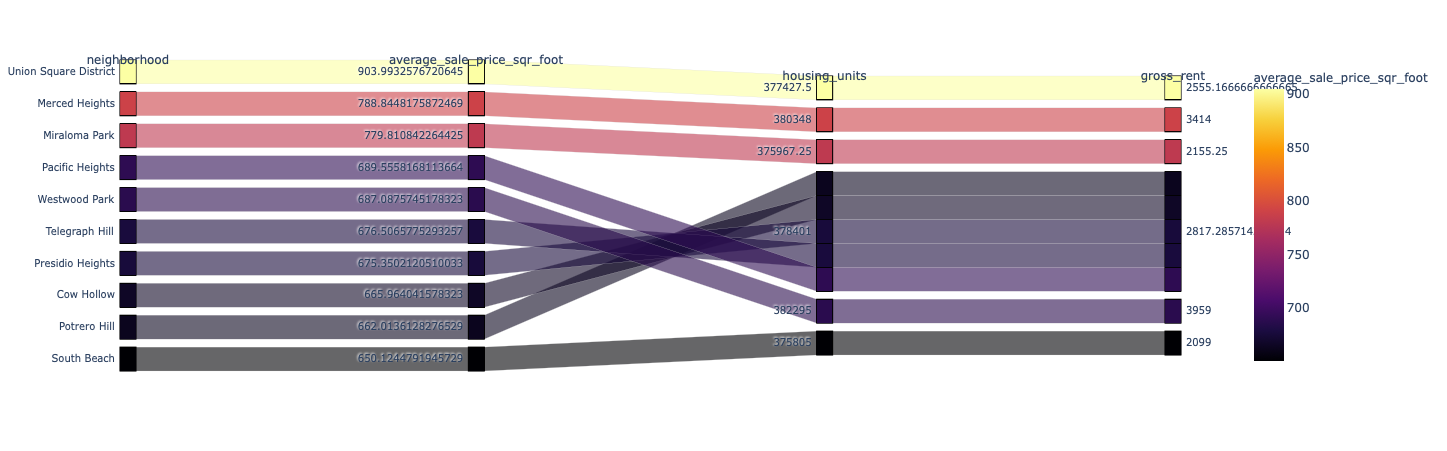

In [278]:
# Parallel Categories Plot
parallel_categories = px.parallel_categories(
    sfo_data_2.iloc[0:10,:],
    dimensions=["neighborhood", "average_sale_price_sqr_foot", "housing_units", "gross_rent"],
    color="average_sale_price_sqr_foot",
    color_continuous_scale=px.colors.sequential.Inferno,)
parallel_categories

- - - 

## Neighborhood Map

In this section, you will read in neighboor location data and build an interactive map with the average prices per neighborhood. Use a scatter_mapbox from plotly express to create the visualization. Remember, you will need your mapbox api key for this.

### Load Location Data

In [201]:
# Load neighborhoods coordinates data
file_path = Path("Data/neighborhoods_coordinates.csv")
df_neighborhood_locations = pd.read_csv(file_path)
df_neighborhood_locations.head()

,Neighborhood,Lat,Lon
0,Alamo Square,37.791012,-122.402100
1,Anza Vista,37.779598,-122.443451
2,Bayview,37.734670,-122.401060
3,Bayview Heights,37.728740,-122.410980
4,Bernal Heights,37.728630,-122.443050


### Data Preparation

You will need to join the location data with the mean prices per neighborhood

1. Calculate the mean values for each neighborhood
2. Join the average values with the neighborhood locations

In [205]:
# Calculate the mean values for each neighborhood
sfo_data_3 = sfo_data.groupby('neighborhood').mean().reset_index()
sfo_data_3.head()

,neighborhood,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,366.020712,378401.0,2817.285714
1,Anza Vista,373.382198,379050.0,3031.833333
2,Bayview,204.588623,376454.0,2318.400000
3,Bayview Heights,590.792839,382295.0,3739.000000
4,Bernal Heights,576.746488,379374.5,3080.333333


In [220]:
# Join the average values with the neighborhood locations
joint_df = pd.concat([df_neighborhood_locations, sfo_data_3], axis= "columns")
joint_df=joint_df.drop(columns=["neighborhood"])
joint_df.head()

,Neighborhood,Lat,Lon,sale_price_sqr_foot,housing_units,gross_rent
0,Alamo Square,37.791012,-122.402100,366.020712,378401.0,2817.285714
1,Anza Vista,37.779598,-122.443451,373.382198,379050.0,3031.833333
2,Bayview,37.734670,-122.401060,204.588623,376454.0,2318.400000
3,Bayview Heights,37.728740,-122.410980,590.792839,382295.0,3739.000000
4,Bernal Heights,37.728630,-122.443050,576.746488,379374.5,3080.333333


### Mapbox Visualization

Plot the aveage values per neighborhood with a plotly express scatter_mapbox visualization.

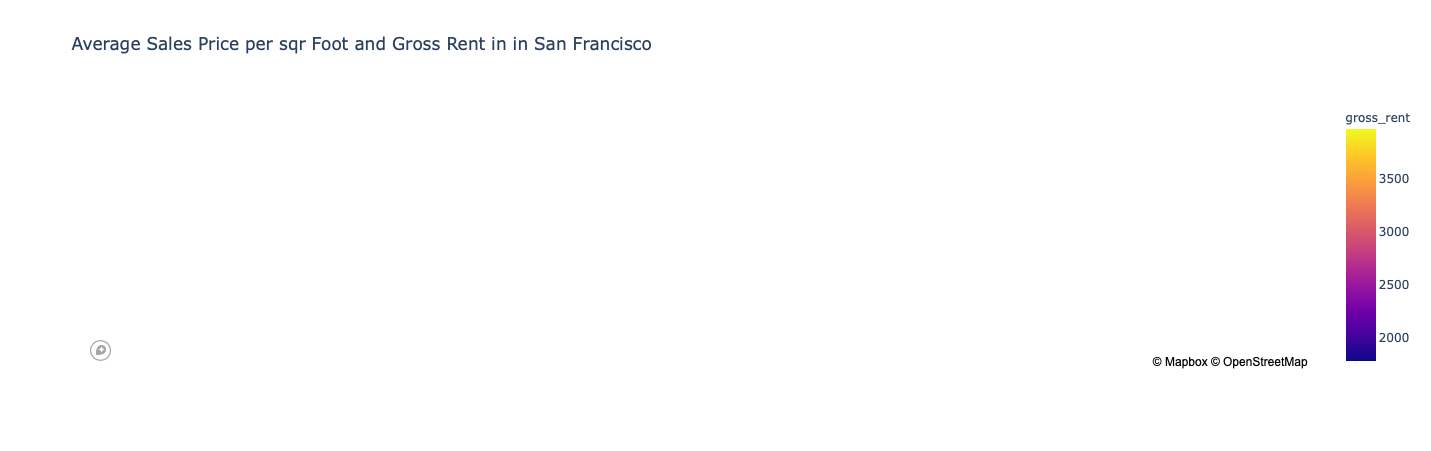

In [226]:
# Create a scatter mapbox to analyze neighborhood info
map = px.scatter_mapbox(
    joint_df,
    lat="Lat",
    lon="Lon",
    color="gross_rent",
    size="sale_price_sqr_foot",
    title= "Average Sales Price per sqr Foot and Gross Rent in in San Francisco"
)
map.show()